# Regressão 01 - tarefa 03 - transformações em X e Y

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [19]:
tips = sns.load_dataset("tips") #Criando dados para análise
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # Criando novas colunas
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [20]:
# 1
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips) #Criando MAtriz de Design

In [21]:
modelo = sm.OLS(y, X).fit() #Treinando modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.64e-20
Time:                        11:08:21   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Através da observação dos P-values (P>|T|) dos resíduos, pude chegar à conclusão de que as variáveis 'sex', 'smoker' e 'time' são estatísticamente irrelevantes. Pois seus valores ultrapassam os 5%.

In [22]:
# 2
y, X = patsy.dmatrices('tip ~ net_bill', tips)
modelo = sm.OLS(y, X).fit()
tips['tip_resid'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.02e-23
Time:                        11:08:25   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

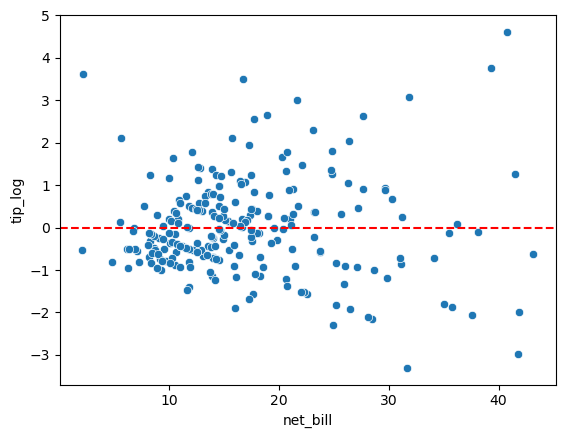

In [23]:
# 3
sns.scatterplot(x = 'net_bill', y = 'tip_resid', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [24]:
# 4
# Transformando net_bill em log
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
modelo = sm.OLS(y, X).fit()
tips['tip_resid'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.40e-20
Time:                        11:08:33   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

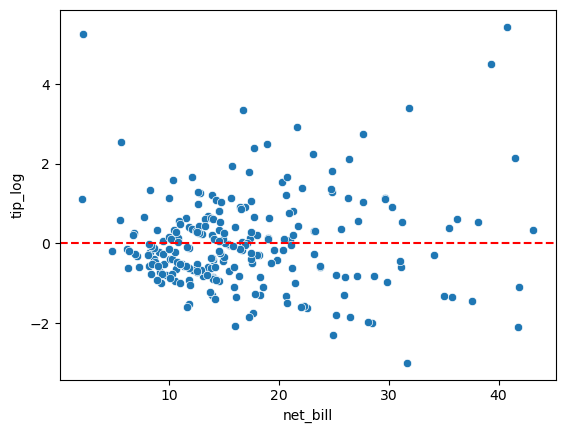

In [25]:
sns.scatterplot(x = 'net_bill', y = 'tip_resid', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [26]:
# Transformando net_bill em polinômio
y, X = patsy.dmatrices('tip ~ I(net_bill**2)', tips)
modelo = sm.OLS(y, X).fit()
tips['tip_resid'] = modelo.resid
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.47e-20
Time:                        11:08:44   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2566      0.104     21.720      0.000       2.052       2.461
I(net_bill ** 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

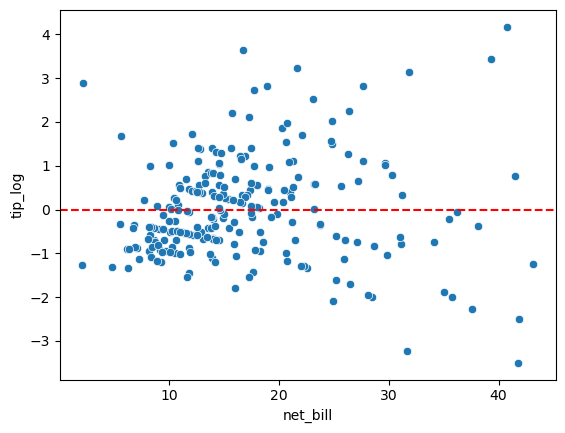

In [27]:
sns.scatterplot(x = 'net_bill', y = 'tip_resid', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

 #### RES.: Observando os valores de r2 e os gráficos dos dois ultimos modelos gerados, cheguei à conclusão de que o modelo com polinômio teve melhor resultado.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
# 1
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [12]:
modelo_2 = sm.OLS(y, X).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.21e-18
Time:                        10:14:30   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Através da observação dos P-values (P>|T|) dos resíduos, pude chegar à conclusão de que as variáveis 'sex', 'smoker' e 'time' são estatísticamente irrelevantes. Pois seus valores ultrapassam os 5%.

In [13]:
# 2
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)

In [17]:
modelo_2 = sm.OLS(y, X).fit()
residuos_2 = modelo_2.resid
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.60e-21
Time:                        10:22:24   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

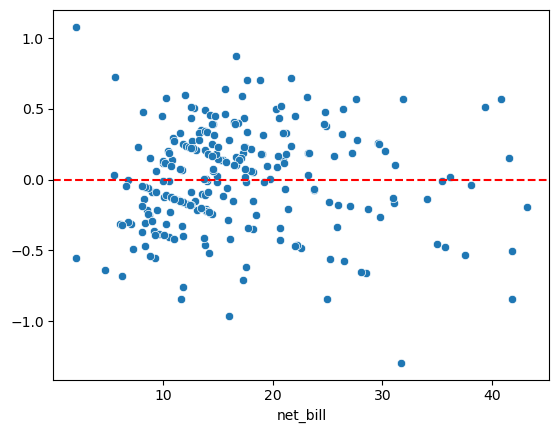

In [18]:
# 3
sns.scatterplot(x = 'net_bill', y = residuos_2, data = tips)
plt.axhline(y = 0, color='r', linestyle='--')

In [28]:
# 4
# Transformando net_bill em log
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)
modelo_2 = sm.OLS(y, X).fit()
residuos_2 = modelo_2.resid
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           5.62e-22
Time:                        11:15:36   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

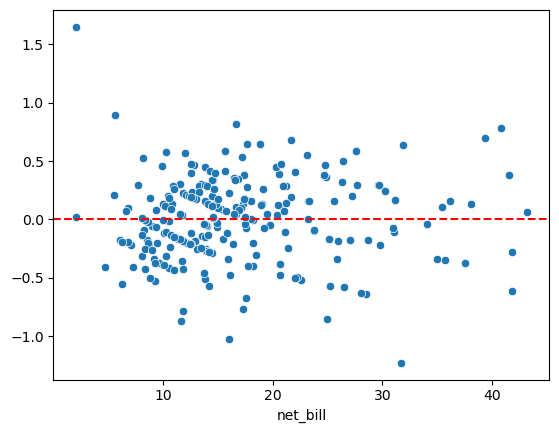

In [29]:
sns.scatterplot(x = 'net_bill', y = residuos_2, data = tips)
plt.axhline(y = 0, color='r', linestyle='--')

In [32]:
# Transformando net_bill em polinômio
y, X = patsy.dmatrices('np.log(tip) ~ I(net_bill**2)', tips)
modelo_2 = sm.OLS(y, X).fit()
residuos_2 = modelo_2.resid
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           7.70e-17
Time:                        11:18:02   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7894      0.034     23.273      0.000       0.723       0.856
I(net_bill ** 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

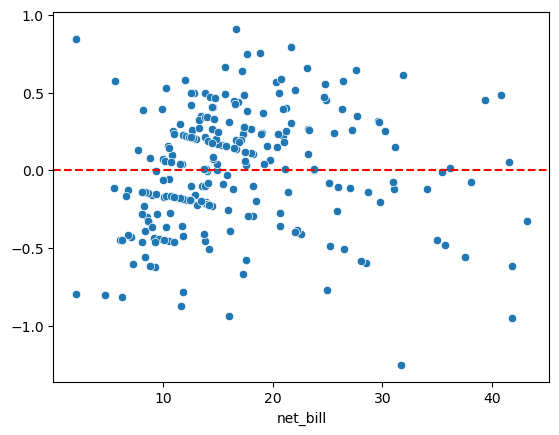

In [33]:
sns.scatterplot(x = 'net_bill', y = residuos_2, data = tips)
plt.axhline(y = 0, color='r', linestyle='--')

#### RES.: Observando os valores de r2 e os gráficos dos dois ultimos modelos gerados, cheguei à conclusão de que o modelo com log de net_bill teve melhor resultado.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [4]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.head(1)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24


In [6]:
# 1
reg = smf.ols('renda ~ tempo_emprego', data=renda).fit()
reg_res = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:51:52   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

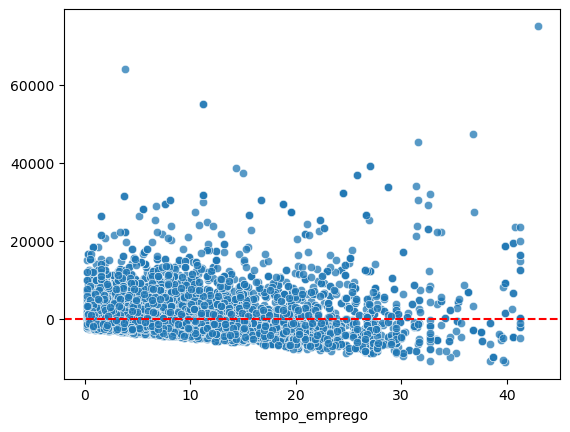

In [8]:
sns.scatterplot(x = 'tempo_emprego', y = reg_res , data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

É possível observar que os resíduos não estão com um padrão aceitável para um bom modelo. Por isso irei testar algumas transformações.

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:22:45   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002

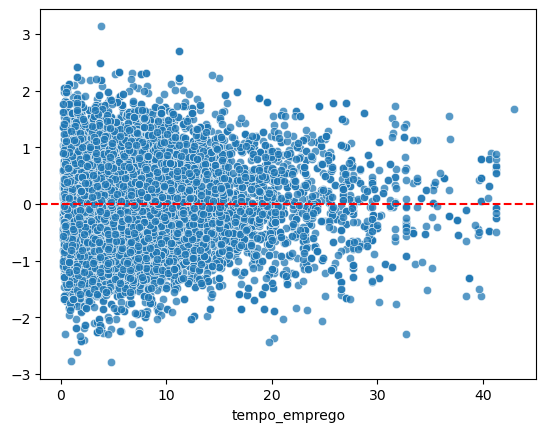

In [42]:
# 2
reg = smf.ols('np.log(renda) ~ tempo_emprego', data=renda).fit()
reg_res = reg.resid
print(reg.summary())

sns.scatterplot(x = 'tempo_emprego', y = reg_res , data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:43:02   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

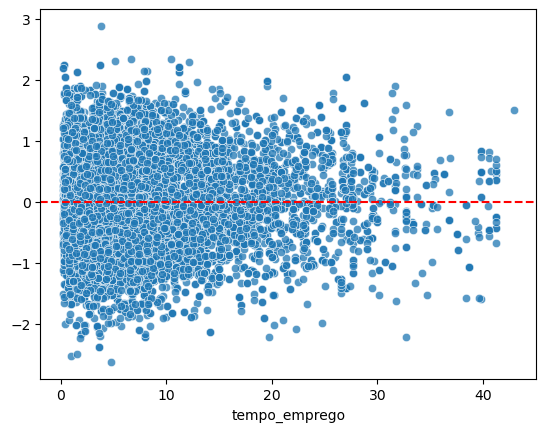

In [49]:
# 3
reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=renda).fit()
print(reg.summary())
reg_res = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = reg_res , data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     1185.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:43:22   Log-Likelihood:                -13365.
No. Observations:               12466   AIC:                         2.674e+04
Df Residuals:                   12462   BIC:                         2.677e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4233      0.030    250.891

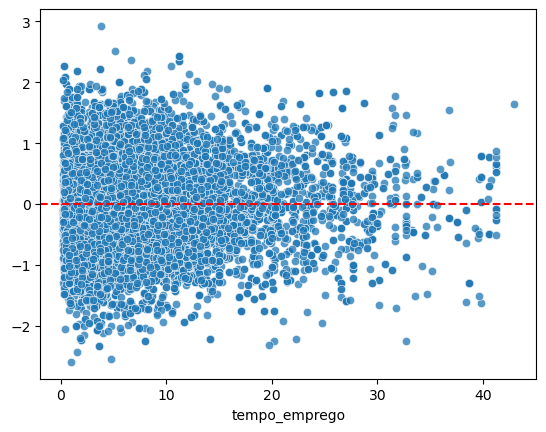

In [50]:
# 4 
reg = smf.ols('np.log(renda) ~ sexo + idade + tempo_emprego', data=renda).fit()
print(reg.summary())
reg_res = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = reg_res , data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Observando apenas os gráficos, não consegui encontrar diferenças significativas na distribuição dos resíduos. Contudo, notei uma queda no r2 após remover as variáveis "não significantes".